In [1]:
import pandas as pd

In [2]:
ruta='./data/datos_pisos.csv'
sep=';'
df = pd.read_csv(ruta,sep=sep)

df.drop('Unnamed: 0', inplace=True, axis=1)
df=df[['uv', 'estado_x', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia', 'ciudad', 'distrito', 'planta','habitaciones', 'banos', 'metros', 'fecha_construccion', 'orientacion', 'situacion', 'portal', 'ascensor', 'parque_infantil','terraza', 'trastero', 'piscina_comunitaria', 'cuarto_de_basura','zonas_comunes', 'piscina', 'garaje', 'tejado', 'calefaccion', 'jardin', 'aire_acondicionado', 'cusec']]
df.piscina = ((df.piscina + df.piscina_comunitaria)>0).astype(int) # para las piscinas no marcadas como comunitarias las juntamos
df.drop('piscina_comunitaria', axis=1)
df.columns

Index(['uv', 'estado_x', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'orientacion', 'situacion', 'portal', 'ascensor',
       'parque_infantil', 'terraza', 'trastero', 'piscina_comunitaria',
       'cuarto_de_basura', 'zonas_comunes', 'piscina', 'garaje', 'tejado',
       'calefaccion', 'jardin', 'aire_acondicionado', 'cusec'],
      dtype='object')

La información de "barrio" del data set es pobre para nuestros propósitos: desechamos la información.


<AxesSubplot:ylabel='Frequency'>

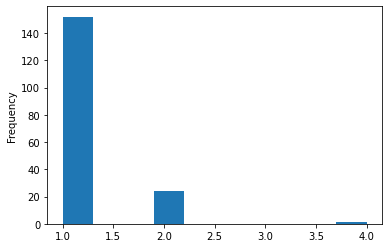

In [3]:
df.uv.value_counts().plot.hist()


In [4]:
df

,uv,estado_x,tipo_vivienda,precio,long,lat,provincia,ciudad,distrito,planta,...,piscina_comunitaria,cuarto_de_basura,zonas_comunes,piscina,garaje,tejado,calefaccion,jardin,aire_acondicionado,cusec
0,UV/2020/000003,01,Piso,160000,40.4278,-3.63083,1,Madrid,San Blas,9,...,0,0,0,0,0,0,0,0,0,2.807915e+09
1,UV/2020/000004,01,Piso,125000,40.1924,-3.66922,1,Valdemoro,Zona estación,1,...,0,0,0,0,0,0,0,0,0,2.816101e+09
2,UV/2020/000006,01,Piso,0,40.4330,-3.63715,1,Madrid,Ciudad Lineal,2,...,0,0,0,0,0,0,0,0,0,2.807915e+09
3,UV/2020/000007,01,Piso,159000,40.2950,-3.80339,1,Fuenlabrada,La Serna,9,...,0,0,0,0,0,0,0,0,0,2.805806e+09
4,UV/2020/000008,01,Piso,170000,40.2846,-3.78862,1,Fuenlabrada,Centro,6,...,1,0,0,1,0,0,0,0,0,2.805802e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,UV/2021/000430,02,Piso,239000,41.3745,2.12767,2,Barcelona,Sants-Montjuïc,2,...,0,0,0,0,0,0,0,0,0,8.019031e+08
200,UV/2021/000430,02,Piso,239000,41.3745,2.12767,2,Barcelona,Sants-Montjuïc,2,...,0,0,0,0,0,0,0,0,0,8.019031e+08
201,UV/2021/000433,01,Piso,300000,41.3809,2.17924,2,Barcelona,Ciutat Vella,0,...,0,0,0,0,0,0,0,0,0,8.019010e+08
202,UV/2021/000441,01,Piso,237000,41.3819,2.14522,2,Barcelona,L' Eixample,3,...,0,0,0,0,0,0,0,0,0,8.019021e+08


La mayoría de inmuebles tiene un identificador único pero uno 20 inmuebles tiene identificador duplicado. Eso oimplica que tendremos que limpiar el dataset con la info que necesitamos.

In [5]:
agrupados = df.groupby('uv').count()['estado_x']
lista_duplicados = agrupados[agrupados>1]
lista_duplicados

uv
UV/2020/000011    2
UV/2020/000071    2
UV/2020/000086    2
UV/2020/000253    2
UV/2020/000303    2
UV/2020/000305    2
UV/2020/000306    2
UV/2020/000307    2
UV/2020/000309    2
UV/2020/000310    4
UV/2020/000322    2
UV/2020/000323    2
UV/2020/000324    2
UV/2020/000327    2
UV/2020/000330    2
UV/2021/000338    2
UV/2021/000345    2
UV/2021/000348    2
UV/2021/000376    2
UV/2021/000389    2
UV/2021/000397    2
UV/2021/000405    2
UV/2021/000417    2
UV/2021/000430    2
UV/2021/000456    2
Name: estado_x, dtype: int64

In [6]:
df[df['uv']== 'UV/2020/000310']

,uv,estado_x,tipo_vivienda,precio,long,lat,provincia,ciudad,distrito,planta,...,piscina_comunitaria,cuarto_de_basura,zonas_comunes,piscina,garaje,tejado,calefaccion,jardin,aire_acondicionado,cusec
94,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
95,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
96,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
97,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09


Vemos que hay alguno re-duplicado

In [7]:
df[df['uv']== 'UV/2020/000310']

,uv,estado_x,tipo_vivienda,precio,long,lat,provincia,ciudad,distrito,planta,...,piscina_comunitaria,cuarto_de_basura,zonas_comunes,piscina,garaje,tejado,calefaccion,jardin,aire_acondicionado,cusec
94,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
95,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
96,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
97,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09


Estos son los inmuebles repetidos en nuestro DF

veamos cómo son los pisos duplicados

veamos qué variables vienen con datos ianconsistentes entre los pisos con mismo identificador pero estado diferente

In [8]:
(df.groupby('uv').nunique()>1).sum()

estado_x                1
tipo_vivienda           0
precio                  1
long                    0
lat                     0
provincia               0
ciudad                  0
distrito                0
planta                  0
habitaciones            8
banos                   9
metros                  0
fecha_construccion      0
orientacion             0
situacion               0
portal                 10
ascensor                3
parque_infantil         0
terraza                 5
trastero                1
piscina_comunitaria     0
cuarto_de_basura        0
zonas_comunes           1
piscina                 0
garaje                  1
tejado                  0
calefaccion             1
jardin                  0
aire_acondicionado      0
cusec                   0
dtype: int64

Solo hay uno que los precios son diferentes al agrupar por uv

In [9]:
precio_distintos_uv_igual=df.groupby('uv').nunique()['precio']>1
precio_distintos_uv_igual[precio_distintos_uv_igual]

uv
UV/2020/000310    True
Name: precio, dtype: bool

In [10]:
df[df.uv=='UV/2020/000310']

,uv,estado_x,tipo_vivienda,precio,long,lat,provincia,ciudad,distrito,planta,...,piscina_comunitaria,cuarto_de_basura,zonas_comunes,piscina,garaje,tejado,calefaccion,jardin,aire_acondicionado,cusec
94,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
95,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
96,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
97,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09


Vemmos que surge la idea de el problema surge que el precio ha variado al reformarlo y estáa duplicado. Nos cargamos los tres primeros


In [11]:
df = df.drop([df.index[94], df.index[95], df.index[96]])
  

In [12]:
df_campos_diferentes = df.groupby('uv').agg('nunique')
df_campos_diferentes.dropna(axis=0, how='all',inplace=True)

In [13]:
df_campos_diferentes

,estado_x,tipo_vivienda,precio,long,lat,provincia,ciudad,distrito,planta,habitaciones,...,piscina_comunitaria,cuarto_de_basura,zonas_comunes,piscina,garaje,tejado,calefaccion,jardin,aire_acondicionado,cusec
uv,,,,,,,,,,,,,,,,,,,,,
UV/2020/000003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
UV/2020/000004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
UV/2020/000006,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
UV/2020/000007,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
UV/2020/000008,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UV/2021/000444,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
UV/2021/000448,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
UV/2021/000451,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [14]:
df=df.groupby('uv').last()

In [16]:
df.columns


Index(['estado_x', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'orientacion', 'situacion', 'portal', 'ascensor',
       'parque_infantil', 'terraza', 'trastero', 'piscina_comunitaria',
       'cuarto_de_basura', 'zonas_comunes', 'piscina', 'garaje', 'tejado',
       'calefaccion', 'jardin', 'aire_acondicionado', 'cusec'],
      dtype='object')

In [18]:
df.columns=['estado', 'tipo', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'orientacion', 'intext', 'portal', 'ascensor',
       'parque_infantil', 'terraza', 'trastero', 'piscina_comunitaria',
       'cuarto_de_basura', 'zonas_comunes', 'piscina', 'garaje', 'tejado',
       'calefaccion', 'jardin', 'aire_acondicionado', 'area_censal']

In [19]:
df

,estado,tipo,precio,long,lat,provincia,ciudad,distrito,planta,habitaciones,...,piscina_comunitaria,cuarto_de_basura,zonas_comunes,piscina,garaje,tejado,calefaccion,jardin,aire_acondicionado,area_censal
uv,,,,,,,,,,,,,,,,,,,,,
UV/2020/000003,01,Piso,160000,40.4278,-3.63083,1,Madrid,San Blas,9,2,...,0,0,0,0,0,0,0,0,0,2.807915e+09
UV/2020/000004,01,Piso,125000,40.1924,-3.66922,1,Valdemoro,Zona estación,1,2,...,0,0,0,0,0,0,0,0,0,2.816101e+09
UV/2020/000006,01,Piso,0,40.4330,-3.63715,1,Madrid,Ciudad Lineal,2,2,...,0,0,0,0,0,0,0,0,0,2.807915e+09
UV/2020/000007,01,Piso,159000,40.2950,-3.80339,1,Fuenlabrada,La Serna,9,3,...,0,0,0,0,0,0,0,0,0,2.805806e+09
UV/2020/000008,01,Piso,170000,40.2846,-3.78862,1,Fuenlabrada,Centro,6,3,...,1,0,0,1,0,0,0,0,0,2.805802e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UV/2021/000444,01,Piso,120000,40.3907,-3.76437,1,Madrid,Latina,5,3,...,0,0,0,0,0,0,0,0,0,2.807910e+09
UV/2021/000448,01,Piso,130000,40.4290,-3.63959,1,Madrid,Ciudad Lineal,3,2,...,0,0,0,0,0,0,0,0,0,2.807915e+09
UV/2021/000451,01,Piso,99900,41.3678,2.10107,2,Hospitalet De Llobregat,Can Serra - Pubilla Cases,1,2,...,0,0,0,0,0,0,0,0,0,8.101050e+08
